# Ames Housing ML Challenge


In [6]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

from sklearn.linear_model import LinearRegression, HuberRegressor


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
### Reference
#https://www.kaggle.com/vikassingh1996/
#comprehensive-data-preprocessing-and-modeling

# 1.0 EDA

In [8]:
print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

Dimensions of train data: (1460, 81)
Dimensions of test data: (1459, 80)


### Looking at the column values in the train dataset

In [9]:
train.columns.values


array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

###  Isolating the Numerical variables 

In [10]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [11]:
num_housing = train.select_dtypes(include = ['int64', 'float64'])
display(num_housing.head())
display(num_housing.columns.values)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

## Exploring Relationships

In [4]:
train.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
             ]] = train.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
                               ]].astype('object')

### Correlation heatmap for all Continuous variables

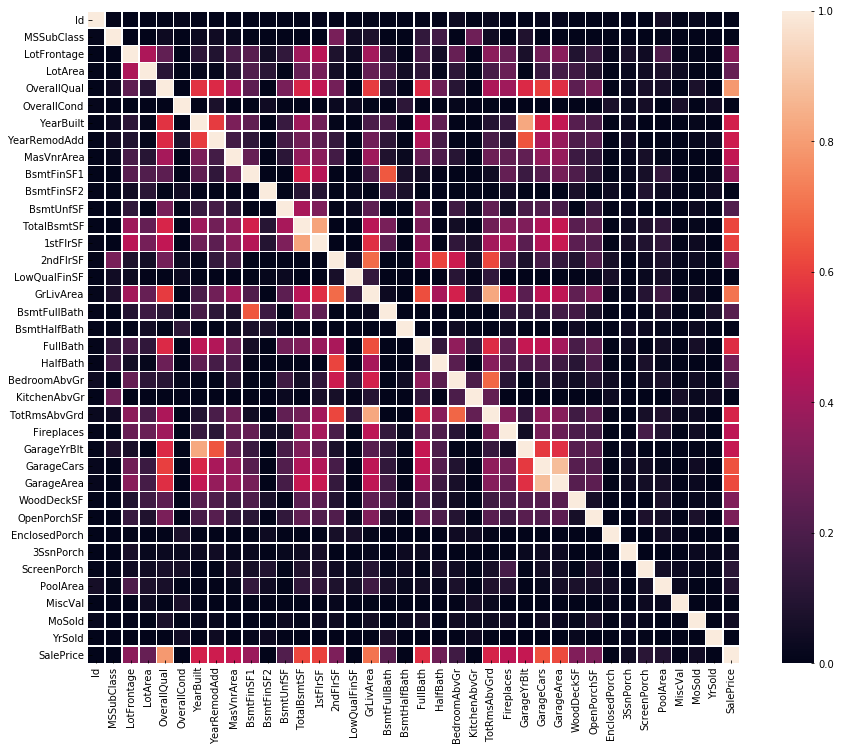

In [12]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

###  Top 10 Correlations

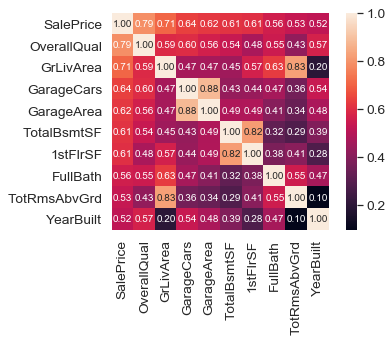

In [13]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Highest Correlations seem to be: 
   - Overall Quality
   - Great Living Area
   - Garage Cars
   - Garage Area
   - Total Basement SF
   - First Floor SF
   - Full Bathrooms
   - Total Rooms above ground
   - Year Built

# Linearity and Remove Outliers

#### 1stFlrSF vs. Sale Price

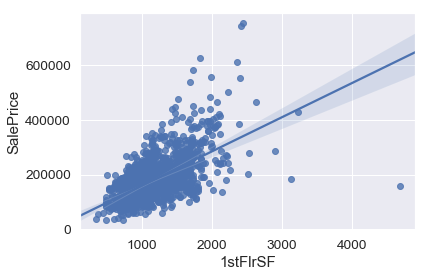

In [14]:
sns.regplot(x=train["1stFlrSF"], y=train["SalePrice"])

In [15]:
threshold = 2000

train = train[train.loc[:,'1stFlrSF'] < threshold]


##### GrLivArea vs. Sale Price

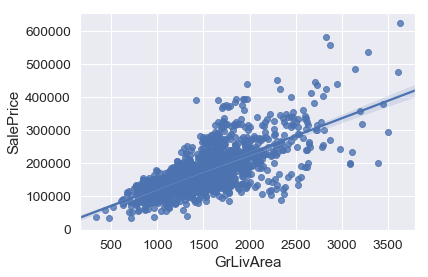

In [16]:
sns.regplot(x=train["GrLivArea"], y=train["SalePrice"])

In [17]:
threshold = 2500

train = train[train.loc[:,'GrLivArea'] < threshold]




##### Garage Area vs. SalePrice

There was a very large number of 0 observations, Meaning that there is no garage. I eliminated these because they do neither add nor subtract anything from the analysis.

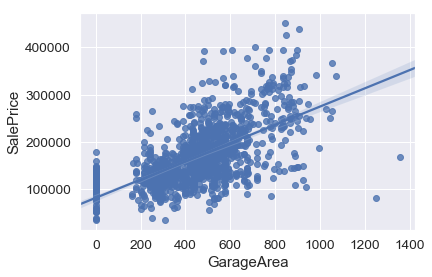

In [18]:
sns.regplot(x=train["GarageArea"], y=train["SalePrice"])

In [19]:
threshold = 1000

train = train[train.loc[:,'GarageArea'] < threshold]

##### Total Basement SF vs. SalePrice

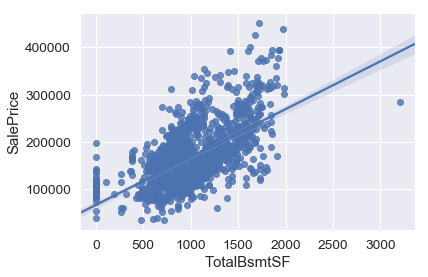

In [20]:

sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"])

In [21]:
threshold = 2000

train = train[train.loc[:,'TotalBsmtSF'] < threshold]


##### Total Rooms Above Ground vs. SalePrice

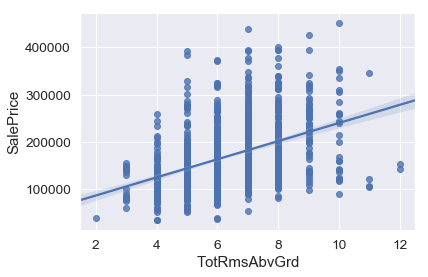

In [22]:

sns.regplot(x=train['TotRmsAbvGrd'], y=train["SalePrice"])

In [23]:
threshold = 14

train = train[train.loc[:,'TotRmsAbvGrd'] < threshold]

## 2. Missing Variables

In [24]:
###### Combining Data
ntrain = train.shape[0]
ntest = test.shape[0]

housing_merge = pd.merge(train, test, how='outer').reset_index(drop=True)

y_house = pd.DataFrame(train.SalePrice.values)

housing_merge.drop(['SalePrice'], axis=1, inplace=True)

print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(housing_merge.shape))

Train data size is : (1353, 81)
Test data size is : (1459, 80)
Combined dataset size is : (2812, 80)


In [25]:
housing_merge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [26]:
total = housing_merge.isna().sum()/housing_merge.isna().count()
sum=housing_merge.isna().sum()

missing=pd.concat([total,sum],axis=1,keys=['Perc','Sum']).sort_values(by='Perc',ascending=False)

colstodrop = missing[missing['Sum']>0].index

missing[missing['Sum']>0]

,Perc,Sum
PoolQC,0.997866,2806
MiscFeature,0.964083,2711
Alley,0.931366,2619
Fence,0.802987,2258
FireplaceQu,0.501778,1411
LotFrontage,0.166430,468
GarageYrBlt,0.055832,157
GarageFinish,0.055832,157
GarageQual,0.055832,157
GarageCond,0.055832,157


In [27]:
y_house.head()

,0
0,208500
1,181500
2,223500
3,140000
4,250000


#### Converting categorical variables in the merged dataset

In [28]:
housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
             ]] = housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
                               ]].astype('object')

### Imputation

#### Imputing mode for MSZoning, Electrical, Utilites, Exterior1st/2nd, KitchenQual, Functional, SaleType, TotalSF

In [29]:
## MSZoning
housing_merge['MSZoning']=housing_merge['MSZoning'].fillna('RL')
print('MSZoning unique Values: ', housing_merge['MSZoning'].unique())

MSZoning unique Values:  ['RL' 'RM' 'C (all)' 'FV' 'RH']


In [30]:
## Electrical
housing_merge['Electrical']=housing_merge['Electrical'].fillna('SBrkr')
print('Electrical unique values: ', housing_merge['Electrical'].unique())

Electrical unique values:  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


In [31]:
## Utilities
housing_merge['Utilities']=housing_merge['Utilities'].fillna('AllPub')
print('Utility unique values: ', housing_merge['Utilities'].unique())

Utility unique values:  ['AllPub' 'NoSeWa']


In [32]:
## Exterior1st
housing_merge['Exterior1st']=housing_merge['Exterior1st'].fillna('VinylSd')
print('Exterior1st unique values: ', housing_merge['Exterior1st'].unique())

Exterior1st unique values:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [33]:
## Exterior2nd
housing_merge['Exterior2nd']=housing_merge['Exterior2nd'].fillna('VinylSd')
print('Exterior2nd unique values: ', housing_merge['Exterior2nd'].unique())

Exterior2nd unique values:  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Other'
 'Stone' 'CBlock']


In [34]:

## KitchenQual
housing_merge['KitchenQual']=housing_merge['KitchenQual'].fillna('TA')
print('Kitchen Quality unique values: ', housing_merge['KitchenQual'].unique())

Kitchen Quality unique values:  ['Gd' 'TA' 'Ex' 'Fa']


In [35]:
#Functional
housing_merge['Functional']=housing_merge['Functional'].fillna('Typ')
print('Functional unique values: ', housing_merge['Functional'].unique())

Functional unique values:  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


In [36]:
##SaleType
housing_merge['SaleType']=housing_merge['SaleType'].fillna('WD')
print('SaleType unique values: ', housing_merge['SaleType'].unique())


SaleType unique values:  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


  #### Imputing median for Lot Frontage,  MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea

In [37]:
# LotFrontage
housing_merge['LotFrontage'].fillna(housing_merge['LotFrontage'].mean(), inplace=True)
print('LotFrontage missing:', housing_merge['LotFrontage'].isna().sum())


LotFrontage missing: 0


In [38]:

# MasVnrArea
housing_merge['MasVnrArea'].fillna(housing_merge['MasVnrArea'].mean(), inplace=True)
print('MasVnrArea missing:', housing_merge['MasVnrArea'].isna().sum())


MasVnrArea missing: 0


In [39]:
# BsmtFinSF1
housing_merge['BsmtFinSF1'].fillna(housing_merge['BsmtFinSF1'].mean(), inplace=True)
print('BsmtFinSF1 missing:', housing_merge['BsmtFinSF1'].isna().sum())


BsmtFinSF1 missing: 0


In [40]:
# BsmtFinSF2
housing_merge['BsmtFinSF2'].fillna(housing_merge['BsmtFinSF2'].mean(), inplace=True)
print('BsmtFinSF2 missing:', housing_merge['BsmtFinSF2'].isna().sum())


BsmtFinSF2 missing: 0


In [41]:
# BsmtUnfSF
housing_merge['BsmtUnfSF'].fillna(housing_merge['BsmtUnfSF'].mean(), inplace=True)
print('BsmtunfSF missing:', housing_merge['BsmtUnfSF'].isna().sum())


BsmtunfSF missing: 0


In [42]:
# TotalBasmtSF
housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())



TotalBsmtSF missing: 0


In [43]:
# GarageArea
housing_merge['GarageArea'].fillna(housing_merge['GarageArea'].mean(), inplace=True)
print('GarageArea missing:', housing_merge['GarageArea'].isna().sum())



GarageArea missing: 0


In [44]:
# Total Bsmt Sf
housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())




TotalBsmtSF missing: 0


#### Imputing median for Bsmt FullBath, BsmtHalfBath, GarageCars, GarageYrBlt

In [45]:
##BedroomAbvGr
housing_merge['BedroomAbvGr'].fillna(housing_merge['BedroomAbvGr'].median(),inplace = True)
print('BedroomAbvGr missing: ', housing_merge['BedroomAbvGr'].isna().sum())

BedroomAbvGr missing:  0


In [46]:
# BsmtFullBath
housing_merge['BsmtFullBath'].fillna(housing_merge['BsmtFullBath'].median(), inplace=True)
print('BsmtFullBath missing:', housing_merge['BsmtFullBath'].isna().sum())



BsmtFullBath missing: 0


In [47]:
#BsmtHalfBath
housing_merge['BsmtHalfBath'].fillna(housing_merge['BsmtHalfBath'].median(), inplace=True)
print('BsmtHalfBath missing:', housing_merge['BsmtHalfBath'].isna().sum())

BsmtHalfBath missing: 0


In [48]:
#Garage Cars
housing_merge['GarageCars'].fillna(housing_merge['GarageCars'].median(), inplace=True)
print('GarageCars missing:', housing_merge['GarageCars'].isna().sum())

GarageCars missing: 0


In [49]:
#GarageYrBlt
housing_merge['GarageYrBlt'].fillna(housing_merge['GarageYrBlt'].median(), inplace=True)
print('GarageYrBlt missing:', housing_merge['GarageYrBlt'].isna().sum())

GarageYrBlt missing: 0


In [50]:
#Fireplaces
housing_merge['Fireplaces'].fillna(housing_merge['Fireplaces'].median(), inplace=True)
print('Fireplaces missing:', housing_merge['Fireplaces'].isna().sum())

Fireplaces missing: 0


In [51]:
#FullBath
housing_merge['FullBath'].fillna(housing_merge['FullBath'].median(), inplace=True)
print('FullBath missing:', housing_merge['FullBath'].isna().sum())

FullBath missing: 0


In [52]:
#HalfBath 
housing_merge['HalfBath'].fillna(housing_merge['HalfBath'].median(), inplace=True)
print('HalfBath  missing:', housing_merge['HalfBath'].isna().sum())

HalfBath  missing: 0


In [53]:

#KitchenAbvGr 
housing_merge['KitchenAbvGr'].fillna(housing_merge['KitchenAbvGr'].median(), inplace=True)
print('KitchenAbvGr  missing:', housing_merge['KitchenAbvGr'].isna().sum())

KitchenAbvGr  missing: 0


In [54]:
#MSSubClass 
housing_merge['MSSubClass'].fillna(housing_merge['MSSubClass'].median(), inplace=True)
print('MSSubClass  missing:', housing_merge['MSSubClass'].isna().sum())

MSSubClass  missing: 0


In [55]:
#MoSold 
housing_merge['MoSold'].fillna(housing_merge['MoSold'].median(), inplace=True)
print('MoSold missing:', housing_merge['MoSold'].isna().sum())

MoSold missing: 0


In [56]:
#OverallCond 
housing_merge['OverallCond'].fillna(housing_merge['OverallCond'].median(), inplace=True)
print('OverallCond missing:', housing_merge['OverallCond'].isna().sum())

OverallCond missing: 0


In [57]:
#OverallQual
housing_merge['OverallQual'].fillna(housing_merge['OverallQual'].median(), inplace=True)
print('OverallQual missing:', housing_merge['OverallQual'].isna().sum())

OverallQual missing: 0


In [58]:
#YrSold
housing_merge['YrSold'].fillna(housing_merge['YrSold'].median(), inplace=True)
print('YrSold missing:', housing_merge['YrSold'].isna().sum())

YrSold missing: 0


#### Imputing 'None' for missing values where NaN is meaningful, i.e. PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageCOnd, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrType

In [59]:
impute_none = housing_merge.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 
                                    'GarageType', 'GarageCond','GarageFinish','GarageQual',
                                    'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
                                    'MasVnrType']]
for i in impute_none.columns:
    housing_merge[i].fillna('None', inplace = True)

In [60]:
#Check

missing_columns = housing_merge.columns[housing_merge.isnull().any()].values
missing_columns = len(housing_merge) - housing_merge.loc[:, np.sum(housing_merge.isnull())>0].count()
missing_columns

Series([], dtype: int64)

In [61]:
housing_merge.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [62]:
housing_merge.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

### Creating New Features

In [67]:
######### New Features

housing_merge['TotalSF'] = (housing_merge['BsmtFinSF1'] + housing_merge['BsmtFinSF2'] 
                           + housing_merge['1stFlrSF'] + housing_merge['2ndFlrSF'])



In [68]:

housing_merge['TotalBathrooms'] = housing_merge['Total_Bathrooms'] = (housing_merge['FullBath'] + (0.5 * housing_merge['HalfBath']) +
                               housing_merge['BsmtFullBath'] + (0.5 * housing_merge['BsmtHalfBath']))



In [69]:
housing_merge['TotalPorchSF'] = (housing_merge['OpenPorchSF'] + housing_merge['3SsnPorch'] +
                             housing_merge['EnclosedPorch'] + housing_merge['ScreenPorch'] +
                              housing_merge['WoodDeckSF'])

In [66]:
housing_merge.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
                  ..
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt        0
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch  

In [70]:
numeric_cols = housing_merge.dtypes[housing_merge.dtypes != "object"].index

In [71]:
categori_cols = housing_merge.dtypes[housing_merge.dtypes == object]

In [72]:
housing_merge.shape

(2812, 84)

# 4.0 Checking Assumptions: Normality

#### 4.1 Normality and Transformation of Dependent Variable Sale Price
Skewness rule of thumb:
if skewness < -1 or greater than 1, the distribution is highley skewed

if the skewness is between +/- 1 and +/- 0.5 the distribution is moderately skewed

if the skewness is between -0.5 and 0.5 the distribution is approximately symmetric

In [73]:
from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import pandas as pd

In [74]:
skewed_num = housing_merge[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skew = pd.DataFrame({'Skew' :skewed_num})




In [75]:
skew_housing_merge = pd.DataFrame(skewed_num, columns=['Skewness'])

skew_housing_sort = skew_housing_merge.sort_values(ascending = False, by ='Skewness')
skew_housing_sort



,Skewness
MiscVal,23.171110
PoolArea,20.823695
LowQualFinSF,13.847747
3SsnPorch,11.429160
LotArea,10.863424
KitchenAbvGr,4.302511
BsmtFinSF2,4.137822
EnclosedPorch,3.980237
BsmtHalfBath,3.903059
ScreenPorch,3.865920


In [ ]:
########################

In [76]:
print("Skewness: %f" % y_house.skew()) ## the closer to 0, the more normal
print("Kurtosis: %f" % y_house.kurt())

Skewness: 1.067792
Kurtosis: 1.577967


<Figure size 720x432 with 0 Axes>

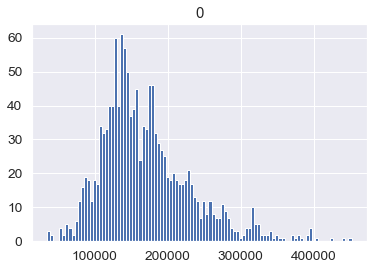

In [77]:
fig = plt.figure(figsize=(10,6))
y_house.hist(bins=100)
plt.show()

####  Transform Sale Price

In [78]:
y_house = np.log1p(y_house)

In [79]:
print("Skewness: %f" % y_house.skew())
print("Kurtosis: %f" % y_house.kurt())


Skewness: -0.181119
Kurtosis: 0.750014


<Figure size 720x432 with 0 Axes>

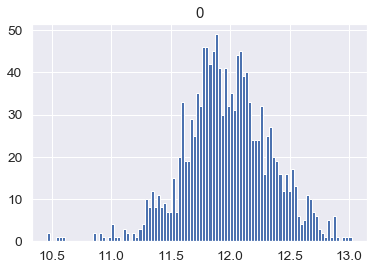

In [80]:
fig = plt.figure(figsize=(10,6))
y_house.hist(bins=100)
plt.show()

#### 4.2 Normality and Transformation of Explanatory Variables

In [81]:
num_housing_merge = housing_merge.select_dtypes(include = ['int64', 'float64'])
display(num_housing_merge.head())
display(num_housing_merge.columns.values)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalBathrooms,Total_Bathrooms,TotalPorchSF
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,2,2008,2416.0,3.5,3.5,61
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,5,2007,2240.0,2.5,2.5,298
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,9,2008,2272.0,3.5,3.5,42
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,2,2006,1933.0,2.0,2.0,307
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,12,2008,2853.0,3.5,3.5,276


array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'TotalSF', 'TotalBathrooms', 'Total_Bathrooms',
       'TotalPorchSF'], dtype=object)

#### Skewness explanatory variables

In [ ]:
#skew_housing_merge = pd.DataFrame(data = housing_merge.select_dtypes(include = ['int64', 'float64'
#]).skew(), columns=['Skewness'])


#skew_housing_sort = skew_housing_merge.sort_values(ascending = False, by ='Skewness')
#skew_housing_sort

#### Transformation


Transform

In [82]:
## non normal data
housing_merged_skewed = np.log1p(num_housing_merge[num_housing_merge.skew()[num_housing_merge.skew() > 0.5].index])

## normal data
housing_merged_normal = num_housing_merge[num_housing_merge.skew()[num_housing_merge.skew() < 0.5].index]

## combining 
housing_merged_num_all = pd.concat([housing_merged_skewed, housing_merged_normal], axis = 1)


## Updating numerical Data
num_housing_merge.update(housing_merged_num_all)

#### Updating combined data
housing_merge.update(num_housing_merge)

/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


After

In [ ]:
#def draw_histograms(df, variables, n_rows, n_cols):
 #   fig=plt.figure()
  #  for i, var_name in enumerate(variables):
   #     ax=fig.add_subplot(n_rows,n_cols,i+1)
    #    df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (40, 200))
     #   ax.set_title(var_name, fontsize = 43)
      #  ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
       # ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        #ax.set_xlabel('')
   # fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
   # plt.show()
    
#draw_histograms(num_housing_merge, num_housing_merge.columns, 19, 2)

In [83]:
skew_housing_merge = pd.DataFrame(data = num_housing_merge.select_dtypes(include = ['int64', 'float64'
]).skew(), columns=['Skewness'])

skew_housing_sort = skew_housing_merge.sort_values(ascending = False, by ='Skewness')
skew_housing_sort

,Skewness
PoolArea,17.793863
LowQualFinSF,9.162086
3SsnPorch,8.785718
MiscVal,5.218583
BsmtHalfBath,3.746043
KitchenAbvGr,3.495319
ScreenPorch,2.959005
BsmtFinSF2,2.487452
EnclosedPorch,1.946706
HalfBath,0.632726


In [ ]:
#corr = housing_merge.corr()
#f, ax = plt.subplots(figsize=(15, 12))
#sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

## 5.0 Feature Engineering

### 5.1 Scaling Numerical Features

In [84]:
housing_merge['Pool'] = housing_merge['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['Has2flor'] = housing_merge['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasGarage'] = housing_merge['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasBsmt'] = housing_merge['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasFireplace'] = housing_merge['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
housing_merge.shape

In [ ]:
housing_merge.head()

### 5.2 Categorical Features

In [85]:
categori_cols

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

#### Using Label Encoder to encode Categorical Values

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array
from numpy import argmax 


#reference:https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

cols = ( 'Alley','BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities')


In [ ]:
#np.where(np.isnan(housing_merge))

In [87]:
##### process and encode to make it easier for the machine learning algorithm
### to read cat var
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(housing_merge[c].values))
    housing_merge[c] = lbl.transform(list(housing_merge[c].values))
    
print('Shape housing_merge: {}'.format(housing_merge.shape))

Shape housing_merge: (2812, 89)


In [88]:
### hanging back to category

housing_merge[['Alley','BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities']] = housing_merge[['Alley','BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities']].astype('category')


In [89]:
housing_merge = pd.get_dummies(housing_merge, drop_first = True)

In [90]:
print(housing_merge.shape)

(2812, 266)


In [91]:
print(y_house.shape)

(1353, 1)


### To CSV


In [92]:
housing_train = pd.DataFrame(housing_merge.iloc[0:1353, :])
housing_test = pd.DataFrame(housing_merge.iloc[1353:,:])

y_train = pd.DataFrame( y_house)

In [93]:
housing_train.to_csv('housing_train.csv', index = False)
housing_test.to_csv('housing_test.csv', index = False)



y_train.to_csv('y_housing.csv', index = False)